In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)
X = StandardScaler().fit_transform(X)

In [3]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

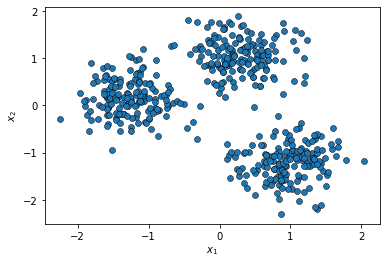

In [4]:
plot_data(X)
plt.savefig('figures/blobs_data.pdf')

In [5]:
from sklearn.cluster import KMeans

labels_k2 = KMeans(n_clusters=2, random_state=0).fit_predict(X)
labels_k3 = KMeans(n_clusters=3, random_state=0).fit_predict(X)
labels_k4 = KMeans(n_clusters=4, random_state=0).fit_predict(X)

Silhouette Score

In [6]:
from sklearn.metrics import silhouette_score

print(f'SI(2 clusters): {silhouette_score(X, labels_k2):.3f}')
print(f'SI(3 clusters): {silhouette_score(X, labels_k3):.3f}')
print(f'SI(4 clusters): {silhouette_score(X, labels_k4):.3f}')

SI(2 clusters): 0.569
SI(3 clusters): 0.659
SI(4 clusters): 0.539


In [7]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def silhouette_plot(X, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Get the silhouette coefficients for samples in cluster i and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()

        # Compute the height of the cluster section
        cluster_size = len(cluster_silhouette_values)
        y_upper = y_lower + cluster_size

        # Plot the coefficients for cluster i using horizontal bars
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Show the cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        # Compute the new y_lower for the next cluster
        y_lower = y_upper + 10 

    # Draw a vertical line for the average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--')

    plt.yticks([])  # Clear the yaxis labels / ticks    
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')

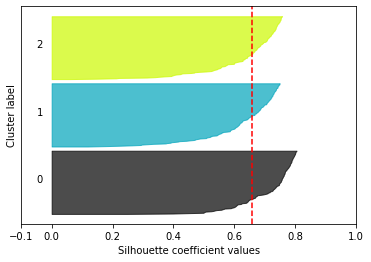

In [8]:
silhouette_plot(X, labels_k3)
plt.savefig('figures/silhouette_plot_3_clusters.pdf')

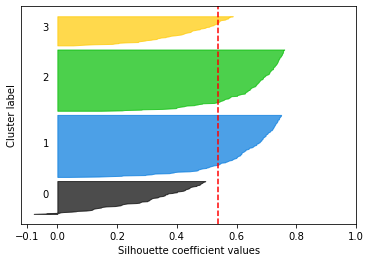

In [9]:
silhouette_plot(X, labels_k4)
plt.savefig('figures/silhouette_plot_4_clusters.pdf')

Calinski-Harabasz Index

In [10]:
from sklearn.metrics import calinski_harabasz_score

print(f'CH(2 clusters): {calinski_harabasz_score(X, labels_k2):.3f}')
print(f'CH(3 clusters): {calinski_harabasz_score(X, labels_k3):.3f}')
print(f'CH(4 clusters): {calinski_harabasz_score(X, labels_k4):.3f}')

CH(2 clusters): 734.120
CH(3 clusters): 1545.857
CH(4 clusters): 1212.066


Davies-Bouldin Index

In [11]:
from sklearn.metrics import davies_bouldin_score

print(f'BD(2 clusters): {davies_bouldin_score(X, labels_k2):.3f}')
print(f'BD(3 clusters): {davies_bouldin_score(X, labels_k3):.3f}')
print(f'BD(4 clusters): {davies_bouldin_score(X, labels_k4):.3f}')

BD(2 clusters): 0.633
BD(3 clusters): 0.480
BD(4 clusters): 0.800
